<a href="https://colab.research.google.com/github/sofiane1010/SIC_checkpoints/blob/main/Checkpoint_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import PolynomialFeatures 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import metrics

#Data analysis

In [ ]:
data = pd.read_csv("kc_house_data.csv")

In [ ]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
data.shape

(21613, 21)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [ ]:
data.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

no missing values.

dropping the id column

In [ ]:
data.drop("id", axis=1, inplace=True)

transforming the date column 

In [ ]:
data["date"] = data["date"].apply(lambda x : int(x[2:6]))

creating a new feature describing the price per feet squared by calculating the average of the price per feet squared of the living and the lot of the house and the neighbours.

In [ ]:
price_living = data["price"]/data["sqft_living"]
price_lot = data["price"]/data["sqft_lot"]
price_living15 = data["price"]/data["sqft_living15"]
price_lot15 = data["price"]/data["sqft_lot15"]
data["price_sqft_avr"] = (price_living + price_lot + price_living15 + price_lot15)/4

In [ ]:
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price_sqft_avr
0,1410,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,108.049134
1,1412,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,168.099663
2,1502,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,85.067418
3,1412,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,248.470228
4,1502,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,179.499096


#Linear regression

since we are looking for linear relationships for linear regression, we will visualize the pearson correlation

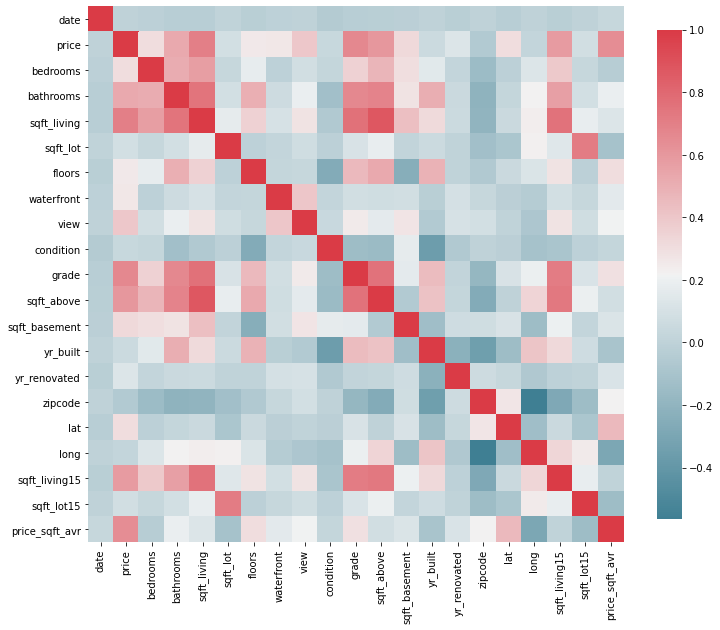

In [ ]:
corr = data.corr(method ='pearson')
s , ax = plt.subplots( figsize =( 12 , 10 ) )
cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
s = sns.heatmap(corr, cmap = cmap, square=True, cbar_kws={ 'shrink' : .9 }, ax=ax, annot_kws = { 'fontsize' : 12 })

In [ ]:
data.corr(method ='pearson')["price"]

date              0.003061
price             1.000000
bedrooms          0.308350
bathrooms         0.525138
sqft_living       0.702035
sqft_lot          0.089661
floors            0.256794
waterfront        0.266369
view              0.397293
condition         0.036362
grade             0.667434
sqft_above        0.605567
sqft_basement     0.323816
yr_built          0.054012
yr_renovated      0.126434
zipcode          -0.053203
lat               0.307003
long              0.021626
sqft_living15     0.585379
sqft_lot15        0.082447
price_sqft_avr    0.642373
Name: price, dtype: float64

we can see that the sqft_living is highly correlated with the target. This is also the case for the grade, sqft_above, sqft_living15 and price_sqft_avr features.

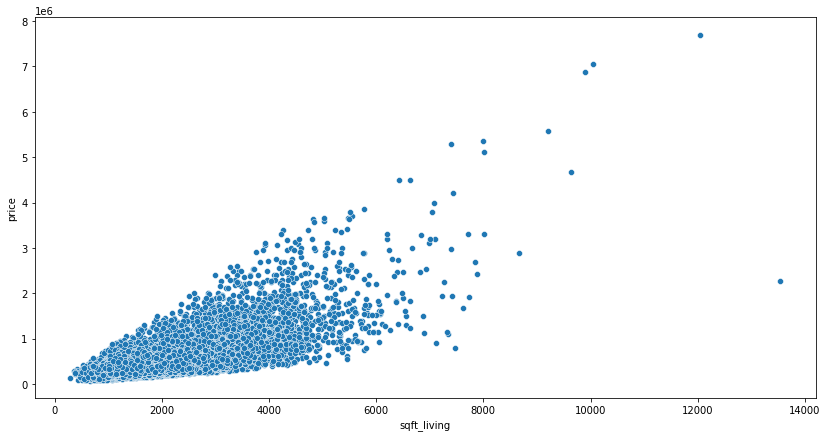

In [ ]:
plt.figure(figsize=(14,7))
sns.scatterplot(x="sqft_living", y="price", data=data)

Splitting the dataset :

In [ ]:
x = data.drop("price", axis=1)
y = data["price"].values

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.35,random_state=40)

applying linear regression

In [ ]:
model=LinearRegression()   #build linear regression model
model.fit(x_train["sqft_living"].values[:,np.newaxis],y_train)  #fitting the training data

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

plotting the linear regression

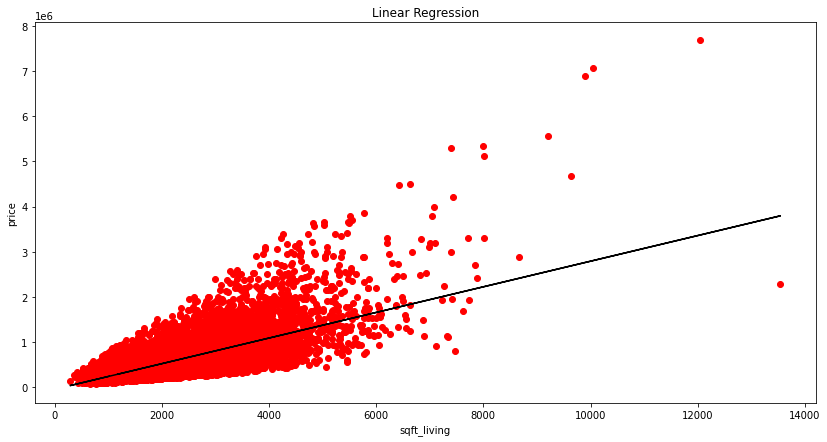

In [ ]:
plt.figure(figsize=(14,7))
plt.scatter(x["sqft_living"],y,color="r")
plt.title("Linear Regression")
plt.ylabel("price")
plt.xlabel("sqft_living")
plt.plot(x["sqft_living"].values[:,np.newaxis],model.predict(x["sqft_living"].values[:,np.newaxis]),color="k")
plt.show()

performance measurement

In [ ]:
predicted=model.predict(x_test["sqft_living"].values[:,np.newaxis]) #testing our model’s performance

print("MSE", mean_squared_error(y_test,predicted))
print("R squared", metrics.r2_score(y_test,predicted))

MSE 62902408306.86502
R squared 0.4996528488387417


#multi-linear regression

now we look for non-linear relationships using spearman correlation

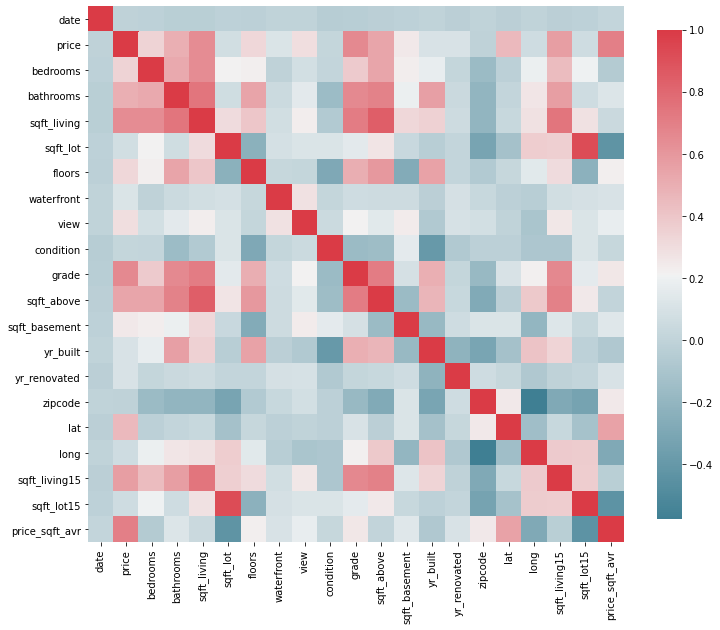

In [ ]:
corr = data.corr(method ='spearman')
s , ax = plt.subplots( figsize =( 12 , 10 ) )
cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
s = sns.heatmap(corr, cmap = cmap, square=True, cbar_kws={ 'shrink' : .9 }, ax=ax, annot_kws = { 'fontsize' : 12 })

In [ ]:
data.corr(method ='spearman')["price"]

date             -0.008799
price             1.000000
bedrooms          0.344652
bathrooms         0.497160
sqft_living       0.644191
sqft_lot          0.074939
floors            0.322347
waterfront        0.115089
view              0.293931
condition         0.018490
grade             0.658215
sqft_above        0.541752
sqft_basement     0.251704
yr_built          0.102038
yr_renovated      0.101876
zipcode          -0.008735
lat               0.456409
long              0.063537
sqft_living15     0.572290
sqft_lot15        0.062766
price_sqft_avr    0.698876
Name: price, dtype: float64

we notice a new strong correlation between price_sqft_avr and price 

In [ ]:
x= data[['sqft_living','price_sqft_avr',"sqft_living15","floors"]]
y=data["price"].values
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.35,random_state=40) 

model=LinearRegression() 
model.fit(x_train,y_train)
predicted=model.predict(x_test)

print("MSE", mean_squared_error(y_test,predicted))
print("R squared", metrics.r2_score(y_test,predicted))

MSE 18206705887.941723
R squared 0.85517766857794


plotting the multi-linear regression

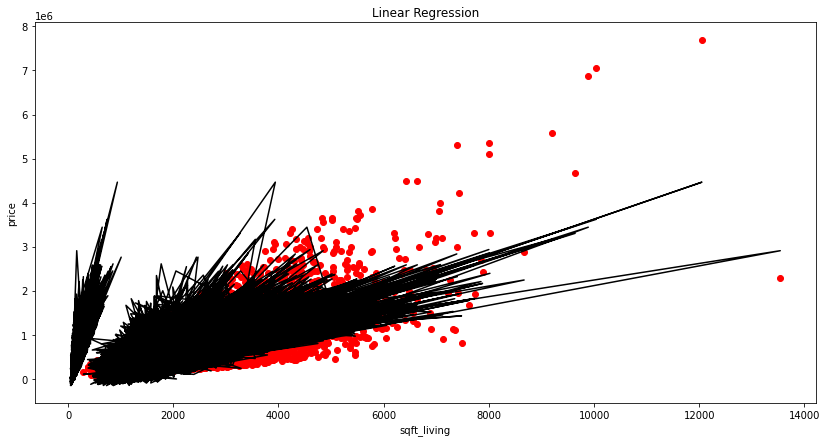

In [ ]:
plt.figure(figsize=(14,7))
plt.scatter(x["sqft_living"],y,color="r")
plt.title("Linear Regression")
plt.ylabel("price")
plt.xlabel("sqft_living")
plt.plot(x,model.predict(x),color="k")
plt.show()

#polynomial regression

In [ ]:
x= data[['sqft_living','price_sqft_avr',"sqft_living15","sqft_lot","sqft_lot15","floors"]]
y= data["price"].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.35, random_state=40)  #splitting data
lg=LinearRegression()
poly=PolynomialFeatures(degree=3)

x_train_fit = poly.fit_transform(x_train) #transforming our input data
lg.fit(x_train_fit, y_train)
x_test_ = poly.fit_transform(x_test)
predicted = lg.predict(x_test_)

print("MSE: ", metrics.mean_squared_error(y_test, predicted))
print("R squared: ", metrics.r2_score(y_test,predicted))

MSE:  2358381523.894951
R squared:  0.9812406311841736


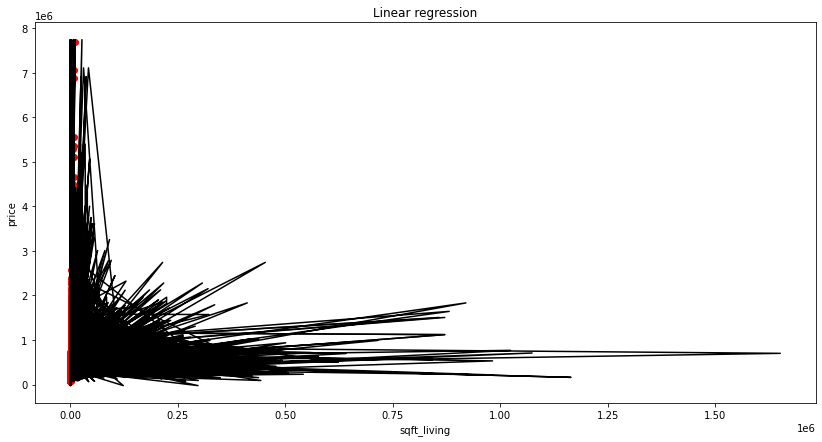

In [ ]:
plt.figure(figsize=(14,7))
plt.scatter(x.sqft_living, y, color="r")
plt.title("Linear regression")
plt.ylabel("price")
plt.xlabel("sqft_living")
plt.plot(x, lg.predict(poly.fit_transform(x)), color="k") 

we can see that the performance of the polynomial regression is way better than the multi-linear and linear regression as it can take precise shapes to fit our data better.